# Initialize

In [13]:
# Mount your google drive to the colab environment
from google.colab import drive
drive.mount('/content/gdrive')


# download NLTK packages
import nltk
!python -m nltk.downloader all

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/usr/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /

# Tweet Cleaning

In [0]:
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer

import re


# Clean the Tweet
def clean_text(tweet):


  # split into words
  tokens = word_tokenize(tweet)
  # convert to lower case
  tokens = [w.lower() for w in tokens]
  # remove punctuation from each word
  import string
  table = str.maketrans('', '', string.punctuation)
  stripped = [w.translate(table) for w in tokens]
  # remove remaining tokens that are not alphabetic
  words = [word for word in stripped if word.isalpha()]
  # filter out stop words
  from nltk.corpus import stopwords
  stop_words = set(stopwords.words('english'))
  words = [w for w in words if not w in stop_words]

  # remove speakers' names from word cloud
  yoshua_name = ['yoshua' , 'bengio', 'yoshuabengio']
  gary_name = ['gary' , 'marcus', 'garymarcus']
  words = [w for w in words if not w in yoshua_name]
  words = [w for w in words if not w in gary_name]

  # detokenize 
  cleaned_sentence = TreebankWordDetokenizer().detokenize(words)

  # remove hyperlink
  cleaned_sentence = re.sub(r"http\S+", "", cleaned_sentence)



  # print(cleaned_sentence)
  return cleaned_sentence



# Read Data

In [0]:
import pandas as pd
import numpy as np

# csv file of the data
file = '/content/gdrive/My Drive/Colab Notebooks/Twitter_Analysis/Analyzed_tweets.csv'

# read as pandas dataframe
df = pd.read_csv(file)

# standardize the time
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

# clean the texts
df['text'] = df['text'].apply(clean_text)





# Word Cloud for All Tweets

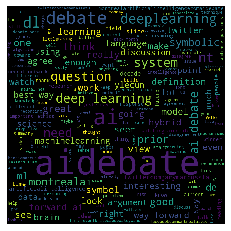

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# change pandas dataframe to word corpus
txt_df = df['text']
np.savetxt('np.txt', txt_df.values, fmt='%s')

with open('np.txt') as file:
  text = file.read()
  # print(text)

# text = ' go go to the school university school school school'
wordcloud = WordCloud(width=1000, height=1000).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
wordcloud.to_file('/content/gdrive/My Drive/Colab Notebooks/Twitter_Analysis/Word Cloud for All Tweets.png')
# plt.figure(figsize=(50,50))
plt.show()


# Word cloud for first week

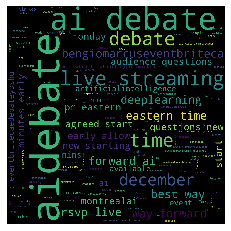

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from datetime import datetime


first_week = df[df['date']<datetime(2019, 12, 23)]

# change pandas dataframe to word corpus
txt_df = first_week['text']
np.savetxt('np.txt', txt_df.values, fmt='%s')

with open('np.txt') as file:
  text = file.read()
  # print(text)

# text = ' go go to the school university school school school'
wordcloud = WordCloud(width=1000, height=1000).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
wordcloud.to_file('/content/gdrive/My Drive/Colab Notebooks/Twitter_Analysis/Word cloud for first week.png')
# plt.figure(figsize=(50,50))
plt.show()

# Word cloud for Second week

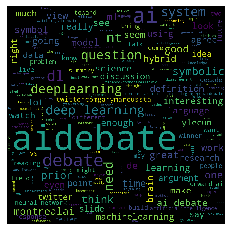

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from datetime import datetime


second_week = df[df['date']>=datetime(2019, 12, 23)]

# change pandas dataframe to word corpus
txt_df = second_week['text']
np.savetxt('np.txt', txt_df.values, fmt='%s')

with open('np.txt') as file:
  text = file.read()
  # print(text)

# text = ' go go to the school university school school school'
wordcloud = WordCloud(width=1000, height=1000).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
wordcloud.to_file('/content/gdrive/My Drive/Colab Notebooks/Twitter_Analysis/Word cloud for second week.png')
# plt.figure(figsize=(50,50))
plt.show()

# Word Cloud of tweets containing the name of Yoshua Bengio

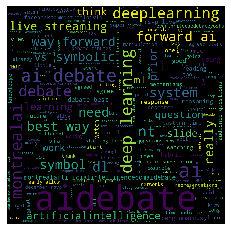

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud



yoshua = df[df['has_yoshua'] == True]

# change pandas dataframe to word corpus
txt_df = yoshua['text']
np.savetxt('np.txt', txt_df.values, fmt='%s')

with open('np.txt') as file:
  text = file.read()
  # print(text)

# text = ' go go to the school university school school school'
wordcloud = WordCloud(width=1000, height=1000).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
wordcloud.to_file('/content/gdrive/My Drive/Colab Notebooks/Twitter_Analysis/Word Cloud of tweets containing the name of Yoshua Bengio.png')
# plt.figure(figsize=(50,50))
plt.show()

# Word Cloud of tweets containing the name of Gary Marcus

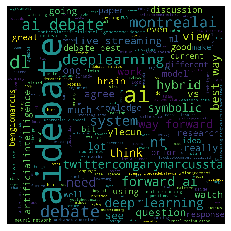

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud



gary = df[df['has_gary'] == True]

# change pandas dataframe to word corpus
txt_df = gary['text']
np.savetxt('np.txt', txt_df.values, fmt='%s')

with open('np.txt') as file:
  text = file.read()
  # print(text)

# text = ' go go to the school university school school school'
wordcloud = WordCloud(width=1000, height=1000).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
wordcloud.to_file('/content/gdrive/My Drive/Colab Notebooks/Twitter_Analysis/Word Cloud of tweets containing the name of Gary Marcus.png')
# plt.figure(figsize=(50,50))
plt.show()

# word cloud of tweets with the emotion JOY

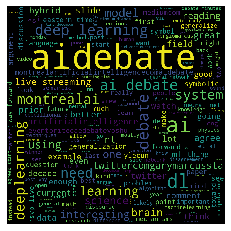

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud



gary = df[df['Joy'] > 0.5]

# change pandas dataframe to word corpus
txt_df = gary['text']
np.savetxt('np.txt', txt_df.values, fmt='%s')

with open('np.txt') as file:
  text = file.read()
  # print(text)

# text = ' go go to the school university school school school'
wordcloud = WordCloud(width=1000, height=1000).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
wordcloud.to_file('/content/gdrive/My Drive/Colab Notebooks/Twitter_Analysis/word cloud of tweets with the emotion JOY.png')
# plt.figure(figsize=(50,50))
plt.show()

# word cloud of tweets with the emotion FEAR

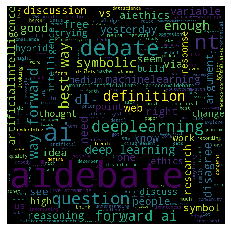

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud



gary = df[df['Fear'] > 0.5]

# change pandas dataframe to word corpus
txt_df = gary['text']
np.savetxt('np.txt', txt_df.values, fmt='%s')

with open('np.txt') as file:
  text = file.read()
  # print(text)

# text = ' go go to the school university school school school'
wordcloud = WordCloud(width=1000, height=1000).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
wordcloud.to_file('/content/gdrive/My Drive/Colab Notebooks/Twitter_Analysis/word cloud of tweets with the emotion FEAR.png')
# plt.figure(figsize=(50,50))
plt.show()

# word cloud of tweets with the emotion SURPRISE

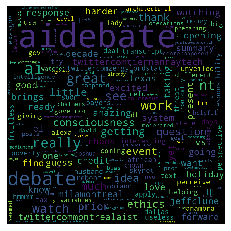

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud



gary = df[df['Surprise'] > 0.5]

# change pandas dataframe to word corpus
txt_df = gary['text']
np.savetxt('np.txt', txt_df.values, fmt='%s')

with open('np.txt') as file:
  text = file.read()
  # print(text)

# text = ' go go to the school university school school school'
wordcloud = WordCloud(width=1000, height=1000).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
wordcloud.to_file('/content/gdrive/My Drive/Colab Notebooks/Twitter_Analysis/word cloud of tweets with the emotion SURPRISE.png')
# plt.figure(figsize=(50,50))
plt.show()

# word cloud of tweets containing the term "Deep learning"

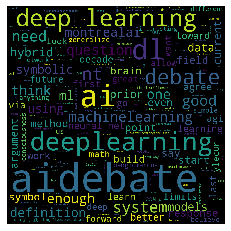

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud



deeplearning = df[df['has_deeplearning'] == True]

# change pandas dataframe to word corpus
txt_df = deeplearning['text']
np.savetxt('np.txt', txt_df.values, fmt='%s')

with open('np.txt') as file:
  text = file.read()
  # print(text)

# text = ' go go to the school university school school school'
wordcloud = WordCloud(width=1000, height=1000).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
wordcloud.to_file('/content/gdrive/My Drive/Colab Notebooks/Twitter_Analysis/word cloud of tweets containing the term DEEP LEARNING.png')
# plt.figure(figsize=(50,50))
plt.show()

# word cloud of tweets containing the term "Symbols"

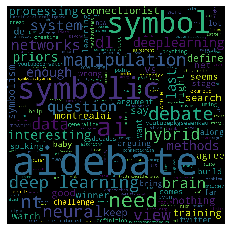

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud



symbol = df[df['has_symbol'] == True]

# change pandas dataframe to word corpus
txt_df = symbol['text']
np.savetxt('np.txt', txt_df.values, fmt='%s')

with open('np.txt') as file:
  text = file.read()
  # print(text)

# text = ' go go to the school university school school school'
wordcloud = WordCloud(width=1000, height=1000).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
wordcloud.to_file('/content/gdrive/My Drive/Colab Notebooks/Twitter_Analysis/word cloud of tweets containing the term SYMBOL.png')
# plt.figure(figsize=(50,50))
plt.show()

# word cloud of tweets containing the term "hybrid"

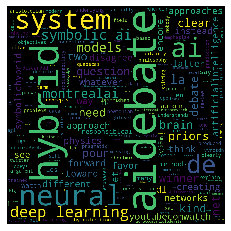

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud



hybrid = df[df['has_hybrid'] == True]

# change pandas dataframe to word corpus
txt_df = hybrid['text']
np.savetxt('np.txt', txt_df.values, fmt='%s')

with open('np.txt') as file:
  text = file.read()
  # print(text)

# text = ' go go to the school university school school school'
wordcloud = WordCloud(width=1000, height=1000).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
wordcloud.to_file('/content/gdrive/My Drive/Colab Notebooks/Twitter_Analysis/word cloud of tweets containing the term "HYBRID.png')
# plt.figure(figsize=(50,50))
plt.show()